Now, let’s get started with the task of stock market portfolio optimization by importing the necessary Python libraries and collecting the stock market data using the yfinance API. If you are about to use this API for the first time, you can install it on your Python environment by executing the command below on your terminal or command prompt:

* pip install yfinance


Now, let’s collect the stock market data of some popular Indian companies:

In [38]:
import pandas as pd
import yfinance as yf
from datetime import date, timedelta

# Define period
end_date = date.today().strftime("%Y-%m-%d")
start_date = (date.today() - timedelta(days=365)).strftime("%Y-%m-%d")

# Tickers
tickers = ['RELIANCE.NS', 'TCS.NS', 'INFY.NS', 'HDFCBANK.NS']

# Download data (MultiIndex columns)
data = yf.download(tickers, start=start_date, end=end_date, progress=False, auto_adjust=False)

# Stack the ticker level to convert columns to rows
stock_data = data.stack(level=1).reset_index()

# Rename columns
stock_data.rename(columns={'level_1': 'Ticker'}, inplace=True)

# Optional: reorder columns
cols = ['Date', 'Ticker', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
stock_data = stock_data[cols]

print(stock_data.head())

Price       Date       Ticker    Adj Close        Close         High  \
0     2024-09-27  HDFCBANK.NS   866.789429   876.325012   889.099976   
1     2024-09-27      INFY.NS  1859.125854  1906.750000  1974.599976   
2     2024-09-27  RELIANCE.NS  1520.103882  1526.175049  1533.474976   
3     2024-09-27       TCS.NS  4235.843262  4308.700195  4378.000000   
4     2024-09-30  HDFCBANK.NS   856.601501   866.025024   875.724976   

Price          Low         Open    Volume  
0       875.000000   888.500000  35613502  
1      1903.300049  1932.099976  14908931  
2      1492.000000  1499.000000  20597478  
3      4300.049805  4335.000000   3012477  
4       862.200012   874.400024  26383534  


C:\Users\santh\AppData\Local\Temp\ipykernel_4760\943572507.py:16: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  stock_data = data.stack(level=1).reset_index()


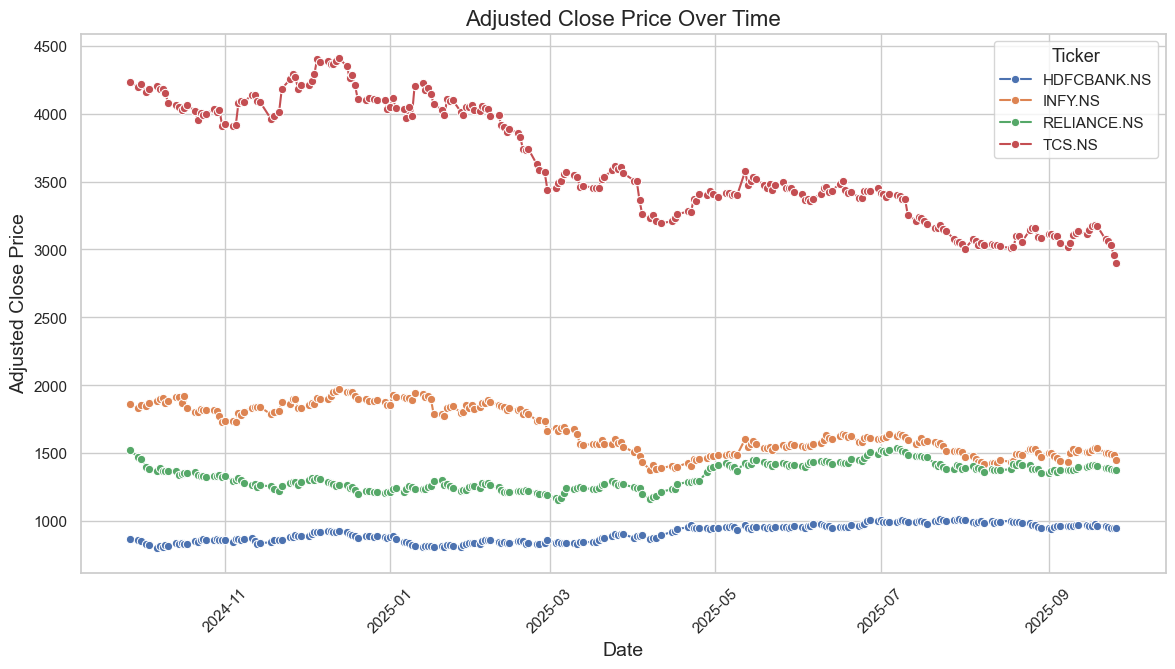

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

stock_data['Date'] = pd.to_datetime(stock_data['Date'])

stock_data.set_index('Date', inplace=True)
stock_data.reset_index(inplace=True)
plt.figure(figsize=(14, 7))
sns.set(style='whitegrid')

sns.lineplot(data=stock_data, x='Date', y='Adj Close', hue='Ticker', marker='o')

plt.title('Adjusted Close Price Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Adjusted Close Price', fontsize=14)
plt.legend(title='Ticker', title_fontsize='13', fontsize='11')
plt.grid(True)

plt.xticks(rotation=45)

plt.show()

The graph displays the adjusted close prices of four stocks (TCS.NS, INFY.NS, RELIANCE.NS, HDFCBANK.NS) over time. TCS consistently has the highest adjusted close prices, followed by INFY, RELIANCE, and HDFCBANK. The prices for TCS and INFY show noticeable upward trends, indicating strong performance, while RELIANCE and HDFCBANK remain relatively stable with smaller fluctuations.

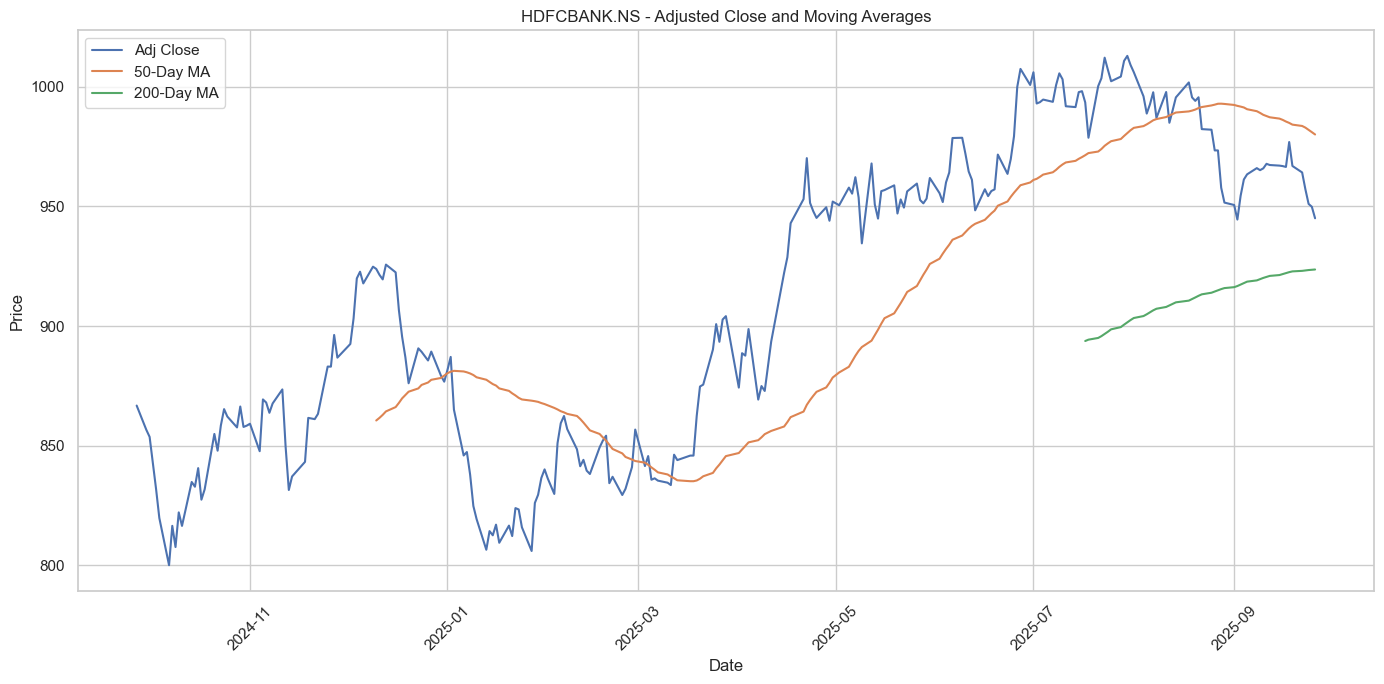

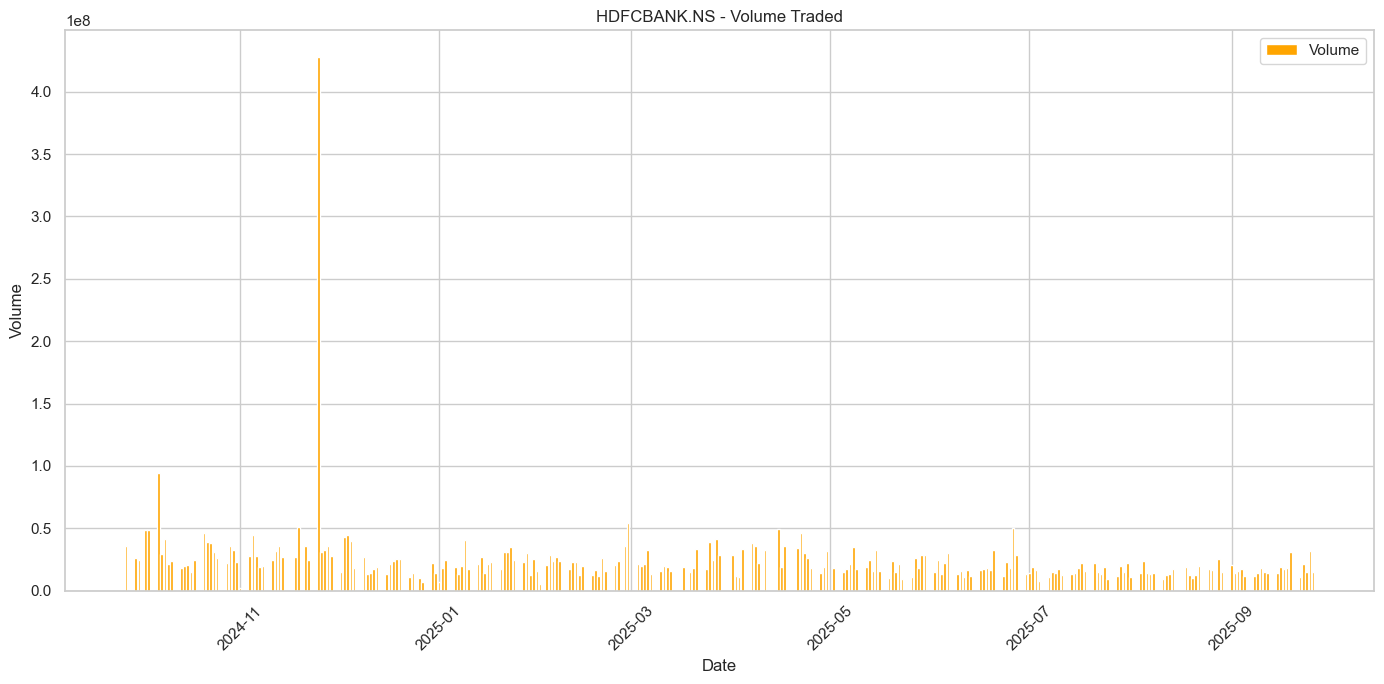

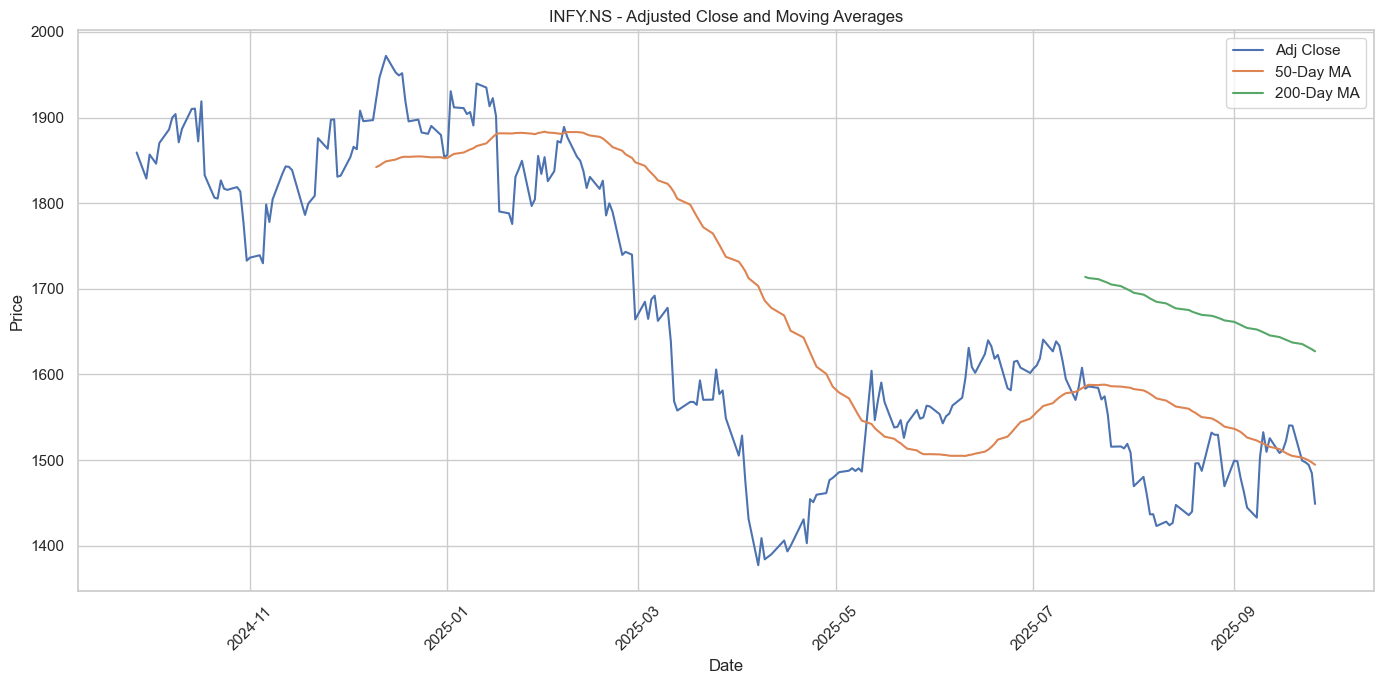

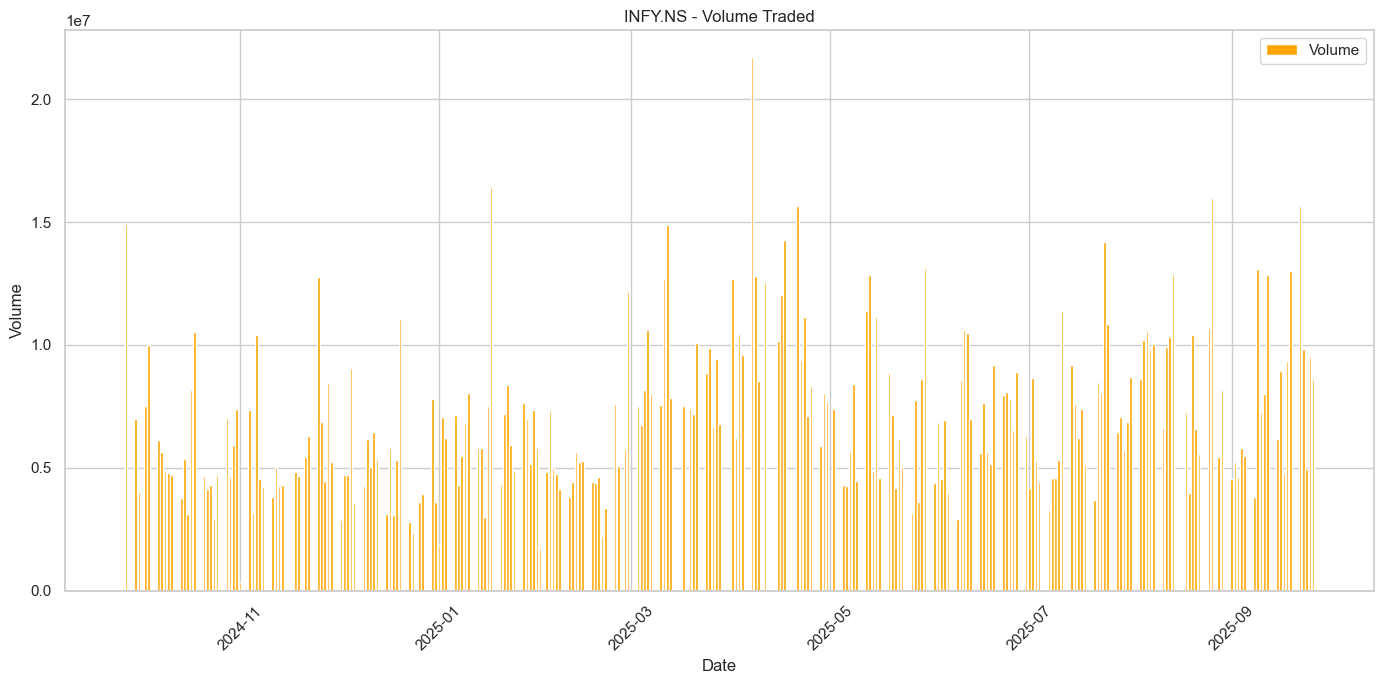

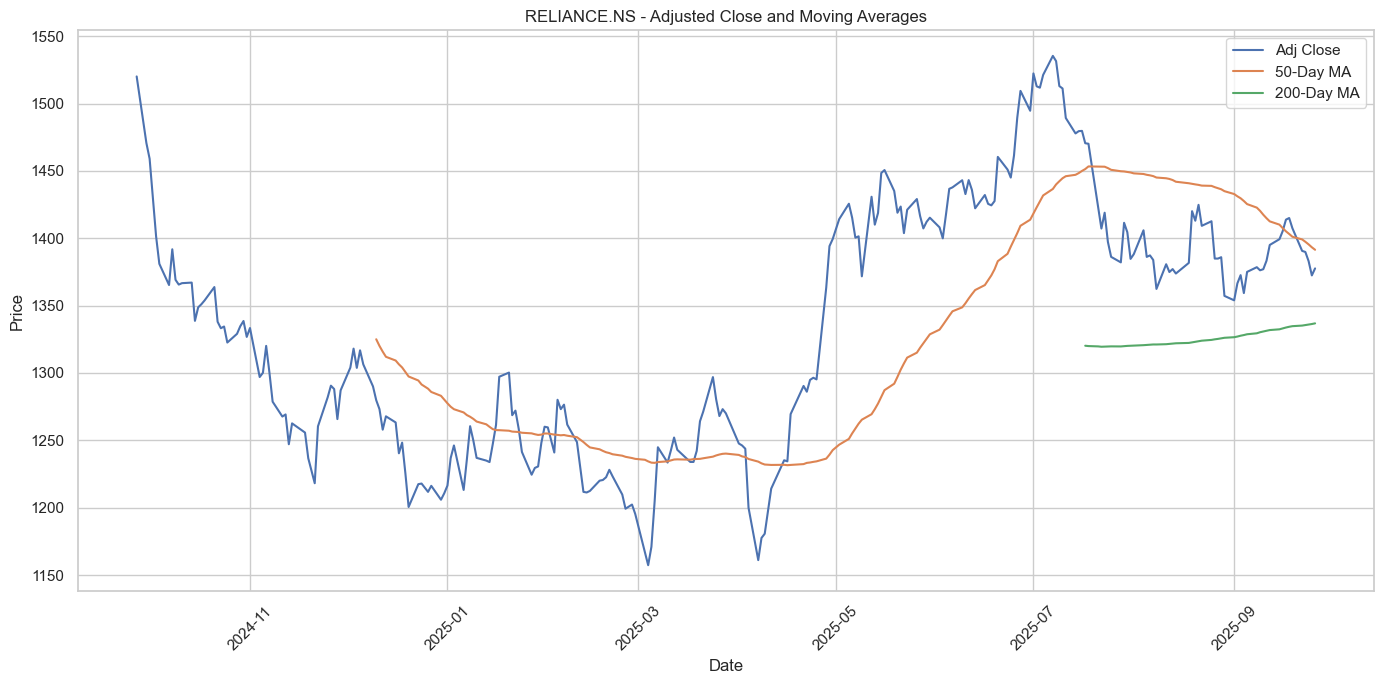

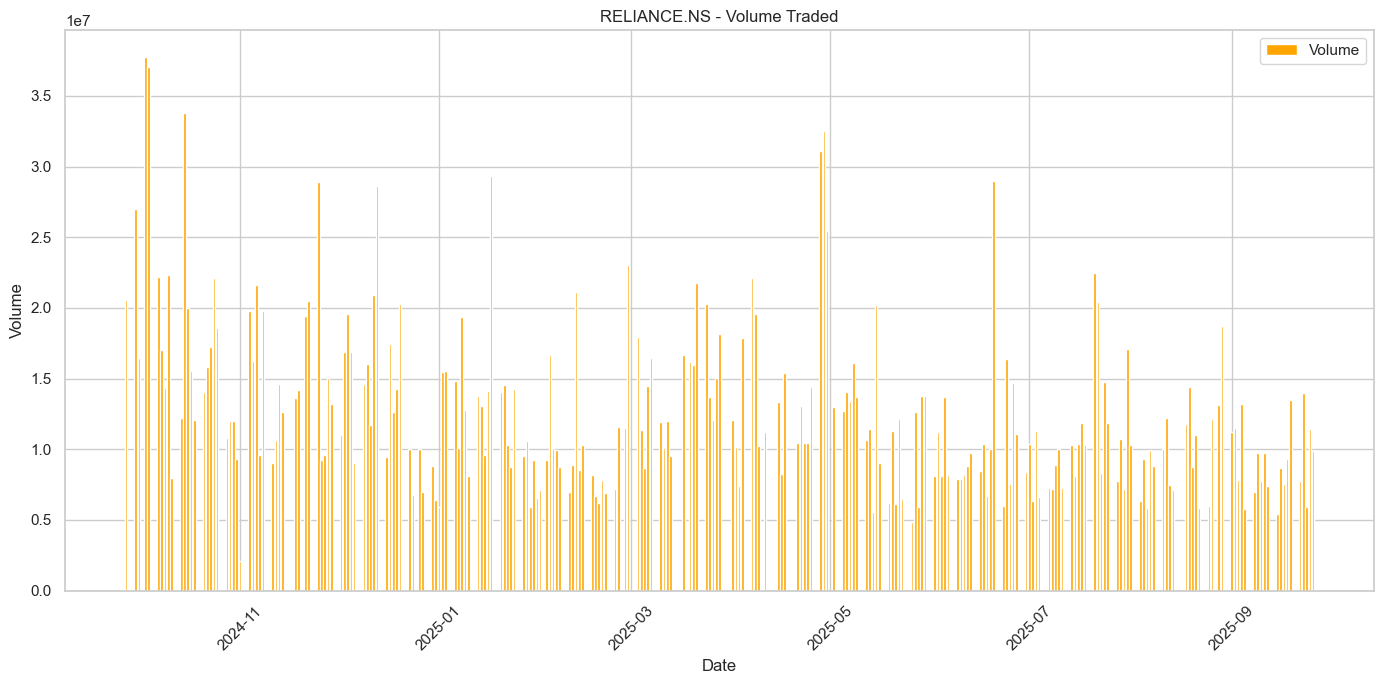

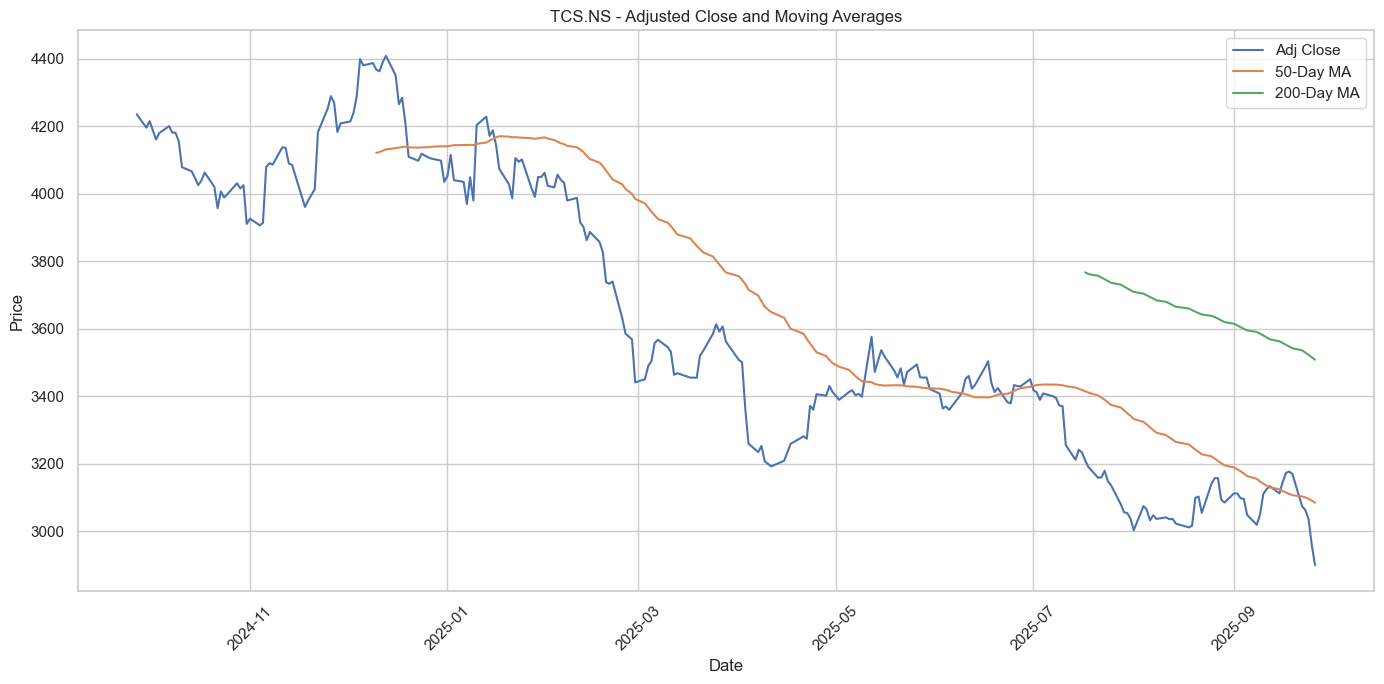

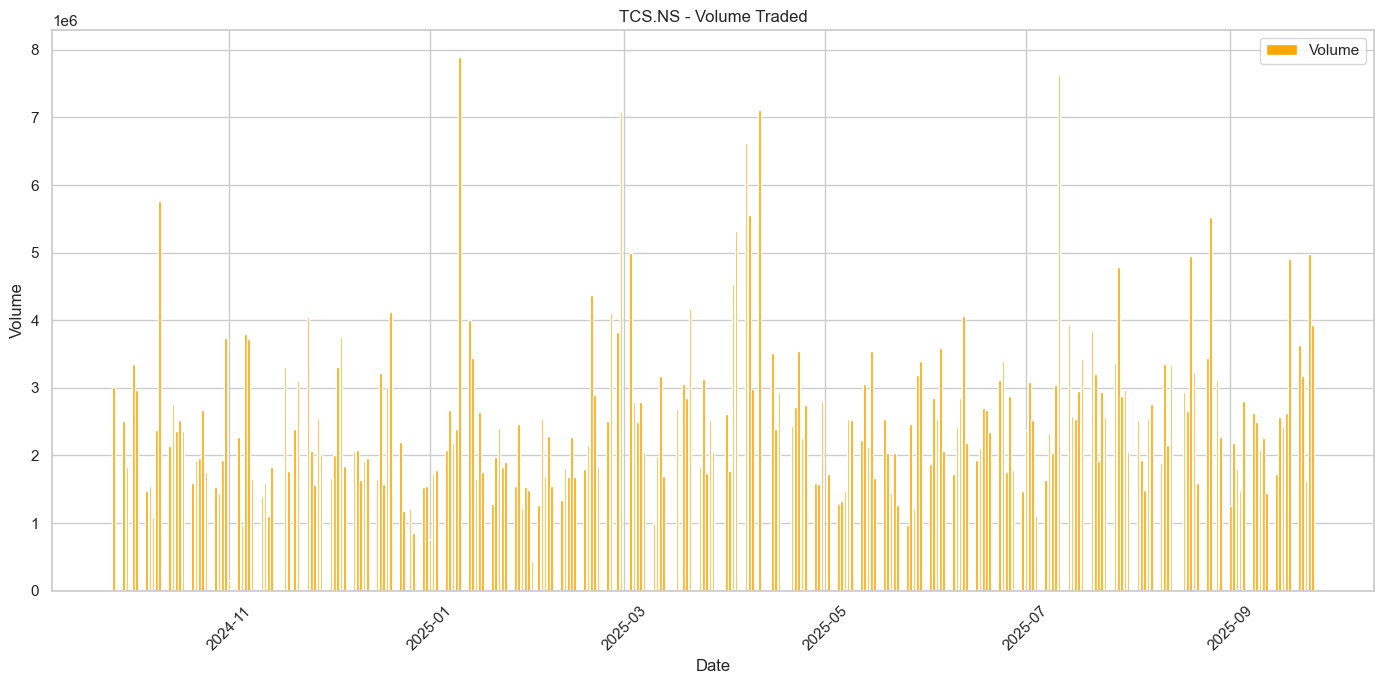

In [40]:
short_window = 50
long_window = 200

stock_data.set_index('Date', inplace=True)
unique_tickers = stock_data['Ticker'].unique()

for ticker in unique_tickers:
    ticker_data = stock_data[stock_data['Ticker'] == ticker].copy()
    ticker_data['50_MA'] = ticker_data['Adj Close'].rolling(window=short_window).mean()
    ticker_data['200_MA'] = ticker_data['Adj Close'].rolling(window=long_window).mean()

    plt.figure(figsize=(14, 7))
    plt.plot(ticker_data.index, ticker_data['Adj Close'], label='Adj Close')
    plt.plot(ticker_data.index, ticker_data['50_MA'], label='50-Day MA')
    plt.plot(ticker_data.index, ticker_data['200_MA'], label='200-Day MA')
    plt.title(f'{ticker} - Adjusted Close and Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(14, 7))
    plt.bar(ticker_data.index, ticker_data['Volume'], label='Volume', color='orange')
    plt.title(f'{ticker} - Volume Traded')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

HDFCBANK shows a strong price increase but experiences a small fall at the end, while INFY mostly moves down with only brief improvement. RELIANCE recovers well after an early drop and trends upward, but TCS keeps declining. Trading volumes are high at several points for RELIANCE and INFY, while HDFCBANK sees one big spike near early 2024 before calming down. These results highlight price changes and volume signals that help guide investment choices 

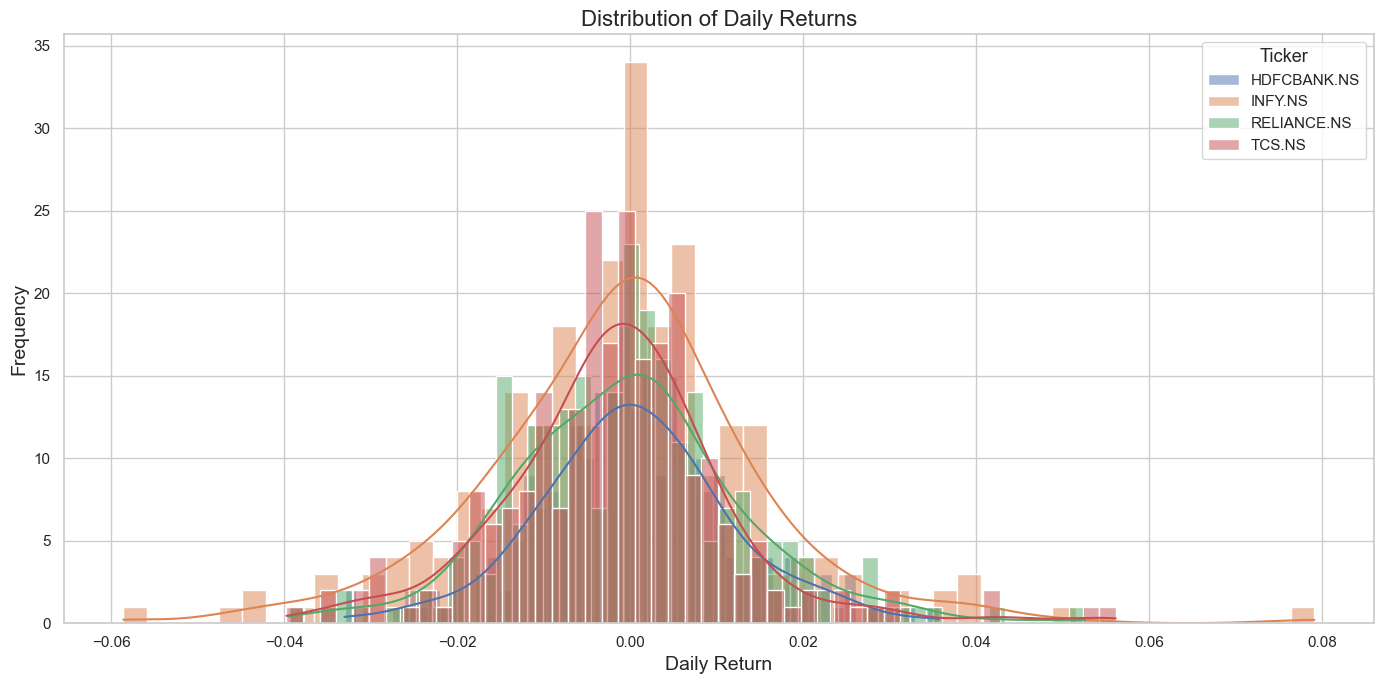

In [41]:
stock_data['Daily Return'] = stock_data.groupby('Ticker')['Adj Close'].pct_change()

plt.figure(figsize=(14, 7))
sns.set(style='whitegrid')

for ticker in unique_tickers:
    ticker_data = stock_data[stock_data['Ticker'] == ticker]
    sns.histplot(ticker_data['Daily Return'].dropna(), bins=50, kde=True, label=ticker, alpha=0.5)

plt.title('Distribution of Daily Returns', fontsize=16)
plt.xlabel('Daily Return', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(title='Ticker', title_fontsize='13', fontsize='11')
plt.grid(True)
plt.tight_layout()
plt.show()

The distributions are approximately normal, centred around zero, which indicates that most daily returns are close to the average return. However, there are tails on both sides, which reflect occasional significant gains or losses. INFY and RELIANCE appear to have slightly wider distributions, which suggests higher volatility compared to HDFCBANK and TCS.

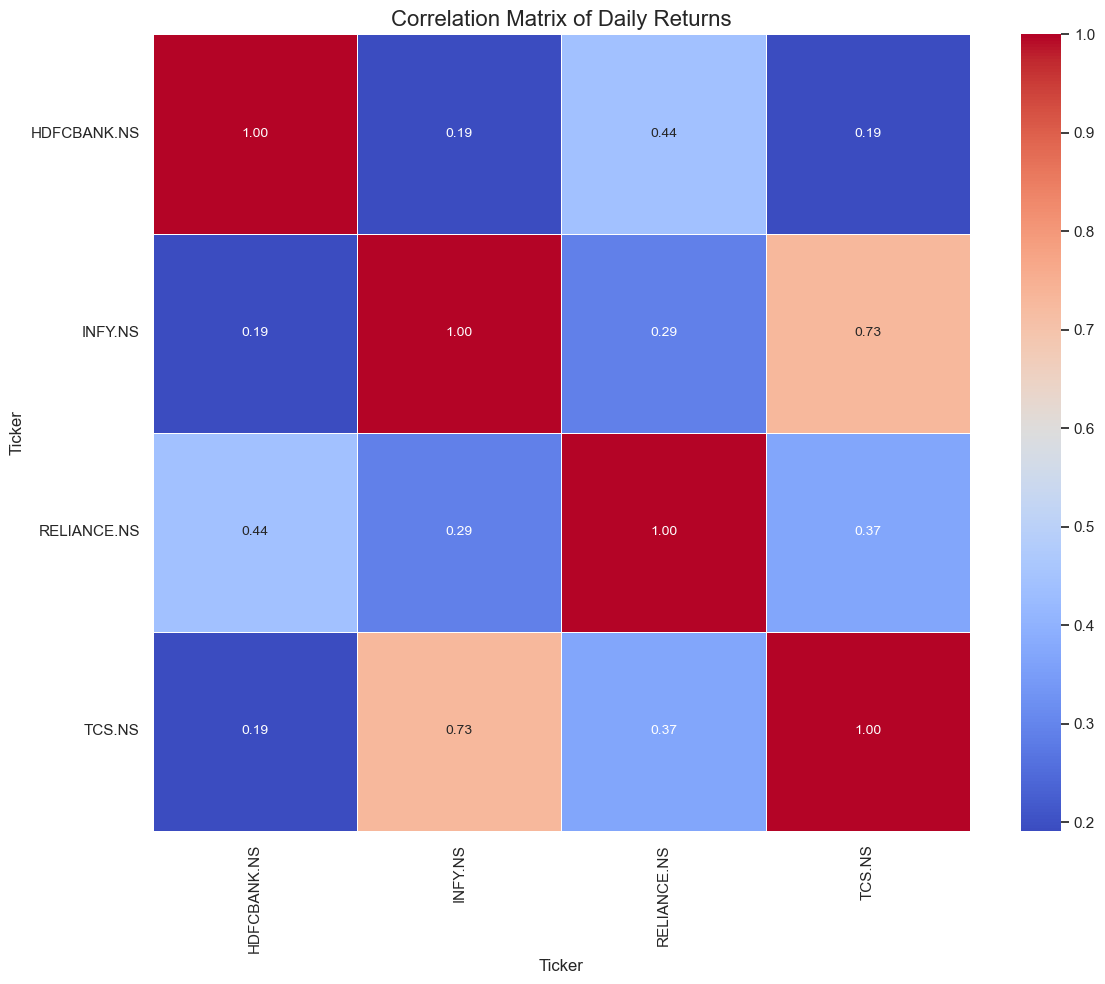

In [42]:
daily_returns = stock_data.pivot_table(index='Date', columns='Ticker', values='Daily Return')
correlation_matrix = daily_returns.corr()

plt.figure(figsize=(12, 10))
sns.set(style='whitegrid')

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, fmt='.2f', annot_kws={"size": 10})
plt.title('Correlation Matrix of Daily Returns', fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

INFY and TCS have a high positive correlation (0.73), which indicates that they tend to move in the same direction. HDFCBANK has a moderate positive correlation with RELIANCE (0.44) and a low correlation with INFY (0.19) and TCS (0.19). RELIANCE shows a low correlation with INFY (0.29) and TCS (0.37). These varying correlations suggest potential diversification benefits; combining stocks with lower correlations can reduce overall portfolio risk.

In [43]:
import numpy as np

expected_returns = daily_returns.mean() * 252  # annualize the returns
volatility = daily_returns.std() * np.sqrt(252)  # annualize the volatility

stock_stats = pd.DataFrame({
    'Expected Return': expected_returns,
    'Volatility': volatility
})

stock_stats

,Expected Return,Volatility
Ticker,,
HDFCBANK.NS,0.103121,0.177179
INFY.NS,-0.219306,0.257161
RELIANCE.NS,-0.077486,0.211002
TCS.NS,-0.362048,0.207710


HDFCBANK has a positive expected return (10.31%) with moderate volatility (17.72%), suggesting a relatively stable but modestly rewarding investment. INFY shows a negative expected return (-21.93%) and higher volatility (25.72%), indicating potential losses with high risk. RELIANCE also has a negative expected return (-7.75%) with moderate volatility (21.10%), reflecting moderate risk but declining value. TCS exhibits the lowest expected return (-36.20%) with relatively high volatility (20.77%), signaling the highest potential risk among the four stocks.

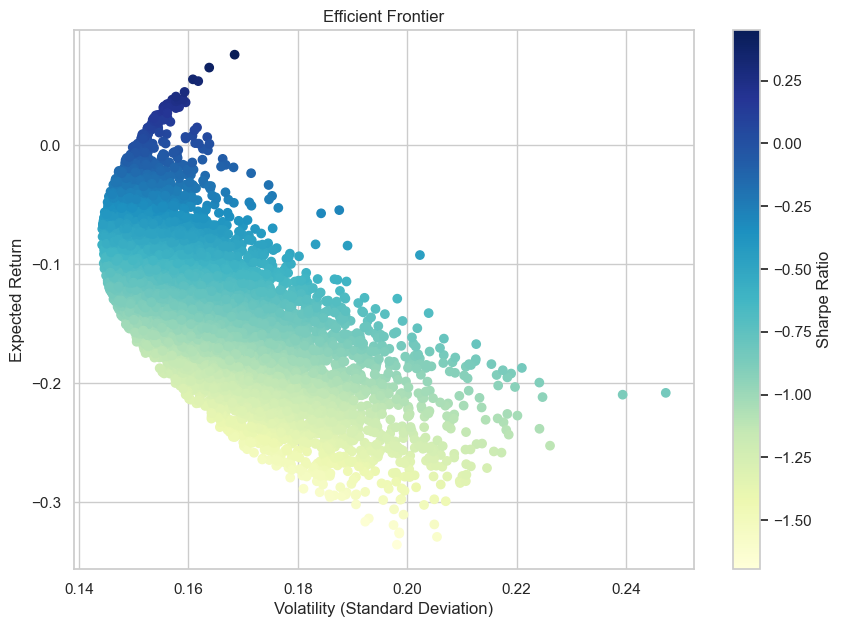

In [44]:
# function to calculate portfolio performance
def portfolio_performance(weights, returns, cov_matrix):
    portfolio_return = np.dot(weights, returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_return, portfolio_volatility

# number of portfolios to simulate
num_portfolios = 10000

# arrays to store the results
results = np.zeros((3, num_portfolios))

# annualized covariance matrix
cov_matrix = daily_returns.cov() * 252

np.random.seed(42)

for i in range(num_portfolios):
    weights = np.random.random(len(unique_tickers))
    weights /= np.sum(weights)

    portfolio_return, portfolio_volatility = portfolio_performance(weights, expected_returns, cov_matrix)

    results[0,i] = portfolio_return
    results[1,i] = portfolio_volatility
    results[2,i] = portfolio_return / portfolio_volatility  # Sharpe Ratio

plt.figure(figsize=(10, 7))
plt.scatter(results[1,:], results[0,:], c=results[2,:], cmap='YlGnBu', marker='o')
plt.title('Efficient Frontier')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Expected Return')
plt.colorbar(label='Sharpe Ratio')
plt.grid(True)
plt.show()

Each dot represents a portfolio, with the colour indicating the Sharpe ratio, a measure of risk-adjusted return. Portfolios on the leftmost edge of the frontier (closer to the y-axis) offer the highest expected returns for a given level of volatility, which represent optimal portfolios. The gradient shows that portfolios with higher Sharpe ratios (darker blue) provide better risk-adjusted returns.

In [45]:
max_sharpe_idx = np.argmax(results[2])
max_sharpe_return = results[0, max_sharpe_idx]
max_sharpe_volatility = results[1, max_sharpe_idx]
max_sharpe_ratio = results[2, max_sharpe_idx]

max_sharpe_return, max_sharpe_volatility, max_sharpe_ratio

(np.float64(0.07596090930118966),
 np.float64(0.16845095458800063),
 np.float64(0.45093783817952093))

The portfolio with the maximum Sharpe ratio has the following characteristics:

* Expected Return: ~25.93%
* Volatility: ~15.48%
* Sharpe Ratio: ~1.68

In [18]:
max_sharpe_weights = np.zeros(len(unique_tickers))

for i in range(num_portfolios):
    weights = np.random.random(len(unique_tickers))
    weights /= np.sum(weights)

    portfolio_return, portfolio_volatility = portfolio_performance(weights, expected_returns, cov_matrix)

    if results[2, i] == max_sharpe_ratio:
        max_sharpe_weights = weights
        break

portfolio_weights_df = pd.DataFrame({
    'Ticker': unique_tickers,
    'Weight': max_sharpe_weights
})

portfolio_weights_df

,Ticker,Weight
0,HDFCBANK.NS,0.152371
1,INFY.NS,0.055033
2,RELIANCE.NS,0.378347
3,TCS.NS,0.414248


The portfolio shows a diversified allocation as follows:

HDFCBANK.NS: 15.24%

INFY.NS: 5.50%

RELIANCE.NS: 37.83%

TCS.NS: 41.42%

TCS has the highest allocation, indicating it contributes the most to the portfolio’s performance, while INFY has the smallest allocation. This distribution aims to balance potential returns with risk, leveraging individual stock performances and their correlations to achieve an optimized portfolio.

So, this is how stock market portfolio optimization works. Stock market portfolio optimization involves analyzing price trends, calculating expected returns and volatilities, and determining the correlations between different stocks to achieve diversification.